# OVERFITTING AND REGULARIZATION

* Load the houseprices data from Kaggle.
* Reimplement your model from the previous lesson.
* Try OLS, Lasso, Ridge and ElasticNet regressions using the same model specification. This time, you need to do k-fold cross-validation to choose the best hyperparameter values for your models. Which model is the best? Why?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings(action = "ignore")

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

from sklearn import linear_model
import statsmodels.api as sm

from sklearn.model_selection import train_test_split



In [2]:
house = pd.read_csv("data/houseprices.csv")
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house["LotArea_year"] = house["LotArea"] * house ["YearBuilt"]
house["LotArea_ov_qual"] = house["LotArea"] * house["OverallQual"]
house["LotArea_ov_cond"] = house["LotArea"] * house["OverallCond"]
house["OverallQuall_square"] = house["OverallQual"]**2

In [4]:
X = house[["LotArea","OverallQual","OverallCond","YearBuilt","OverallQuall_square","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BedroomAbvGr","GarageCars","WoodDeckSF","LotArea_year","LotArea_ov_qual","LotArea_ov_cond"]]
Y = house["SalePrice"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

print("Coefficents : {}".format(model.coef_))
print("Intercept : {}".format(model.intercept_))

Coefficents : [ 2.41448399e+01 -4.69860316e+04  1.05373979e+04  5.75631789e+02
  5.82525882e+03  1.48629273e+01  9.59124150e+00  1.79458636e+01
  1.64531963e+01 -3.41533104e+00  3.09837288e+01 -1.01371280e+03
  1.21741491e+04  1.93461637e+01 -1.01224833e-02 -4.30811939e-01
 -1.71890258e-01]
Intercept : -1070708.2056154495


In [7]:
X_test = sm.add_constant(X_test)
results = sm.OLS(y_test,X_test).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     154.7
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          3.52e-127
Time:                        18:59:59   Log-Likelihood:                -3401.2
No. Observations:                 292   AIC:                             6836.
Df Residuals:                     275   BIC:                             6899.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.091e+05    3.8e+05     -0.812      0.417   -1.06e+06     4.4e+05
LotArea               -38.3055     37.499     -1.022      0.308    -112.127      35.516
OverallQual          -6.43e+04   8346.008     -7.704      0.000   -8.07e+04   -4.79e+04
OverallCond          7045.6541   3204.144      2.199      0.029     737.888    1.34e+04
YearBuilt             235.2472    195.410      1.204      0.230    -149.443     619.938
OverallQuall_square  5680.3739    668.895      8.492      0.000    4363.568    6997.180
BsmtFinSF1             19.3816      4.850      3.997      0.000       9.835      28.928
TotalBsmtSF            29.7716      7.020      4.241      0.000      15.952      43.592
1stFlrSF               29.6835     10.386      2.858      0.005       9.238      50.129
2ndFlrSF               29.9396      9.559      3.132      0.002      11.121      48.759
LowQualFinSF          -23.1761     25.963     -0.893      0.373     -74.287      27.935
GrLivArea              36.4469      9.062      4.022      0.000      18.607      54.286
BedroomAbvGr        -5197.9777   2723.724     -1.908      0.057   -1.06e+04     164.021
GarageCars           1.237e+04   3205.282      3.859      0.000    6059.424    1.87e+04
WoodDeckSF             31.4849     17.107      1.841      0.067      -2.192      65.162
LotArea_year            0.0156      0.019      0.815      0.416      -0.022       0.053
LotArea_ov_qual         1.0345      0.294      3.519      0.001       0.456       1.613
LotArea_ov_cond         0.3719      0.270      1.375      0.170      -0.161       0.904
==============================================================================
Omnibus:                      104.563   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.095
Skew:                           1.218   Prob(JB):                    8.40e-184
Kurtosis:                      10.960   Cond. No.                     2.32e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
test_preds = results.predict(X_test)
train_preds = model.predict(X_train)

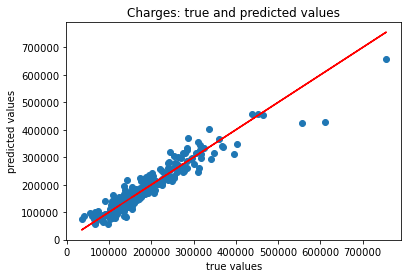

In [9]:
plt.scatter(y_test,test_preds)
plt.plot(y_test,y_test, c ="r")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

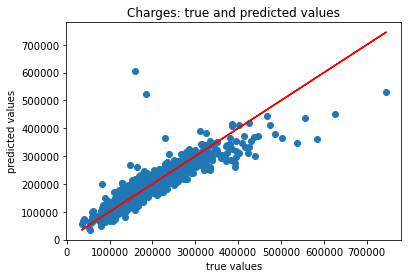

In [10]:
plt.scatter(y_train,train_preds)
plt.plot(y_train,y_train, c ="r")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

* **Lasso regression(L1 regularization)**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha = 10**20.5)
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_test = lassoregr.predict(X_test)
y_preds_train = lassoregr.predict(X_train)


print("Accuracy training set is : {}".format(lassoregr.score(X_train, y_train)))
print("----- Test set statistics -----")
print("Accuracy of test model set is : {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is : {}".format(mse(y_test,y_preds_test)))
print("Root mean squared error of the prediction is : {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared training set is : 0.0
----- Test set statistics -----
R-squared of test model set is : -0.0008824918802490256
Mean absolute error of the prediction is: 62575.926451960964
Mean squared error of the prediction is : 7677095207.783831
Root mean squared error of the prediction is : 87619.03450611533
Mean absolute percentage error of the prediction is: 41.35583143029259


* **Hyperparameter**

In [35]:
parameters = {"alpha": [10 ** x for x in range (-10, 10, 1)],
              }

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
lassoregr = Lasso()
grid_cv = GridSearchCV(estimator=lassoregr,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                   0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000, 1000000, 10000000, 100000000,
                                   1000000000]})

In [40]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'alpha': 1e-10}
Best Score      :  0.7896613675185156


* **Lasso with Best Score and hyperparameter**

In [41]:
lassoregr = Lasso(alpha=0.1) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("Accuracy training set is : {}".format(lassoregr.score(X_train, y_train)))
print("----- Test set statistics -----")
print("Accuracy of test model set is : {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is : {}".format(mse(y_test,y_preds_test)))
print("Root mean squared error of the prediction is : {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.815906790205612
-----Test set statistics-----
R-squared of the model in test set is: 0.834335867641125
Mean absolute error of the prediction is: 21048.960367525993
Mean squared error of the prediction is: 1314959524.11382
Root mean squared error of the prediction is: 36262.37063560269
Mean absolute percentage error of the prediction is: 11.607806114053037


In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge()
grid_cv = GridSearchCV(estimator=ridge,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                   0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000, 1000000, 10000000, 100000000,
                                   1000000000]})

In [44]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'alpha': 1}
Best Score      :  0.7854056384543731


* **Ridge with Best Score and hyperparameter**

In [45]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)

#Making predictions
ytrain_pred_r = ridge.predict(X_train)
ytest_pred_r = ridge.predict(X_test)

print("Accuracy training set is : {}".format(ridge.score(X_train, y_train)))
print("----- Test set statistics -----")
print("Accuracy of test model set is : {}".format(ridge.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test,y_preds_test)))
print("Mean squared error of the prediction is : {}".format(mse(y_test,y_preds_test)))
print("Root mean squared error of the prediction is : {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Accuracy training set is : 0.816032517029946
----- Test set statistics -----
Accuracy of test model set is : 0.8302038540114397
Mean absolute error of the prediction is: 21048.960367525993
Mean squared error of the prediction is : 1314959524.11382
Root mean squared error of the prediction is : 36262.37063560269
Mean absolute percentage error of the prediction is: 11.607806114053037


* **ElasticNET**

In [48]:
parameters = {"alpha": [10 ** x for x in range (-10, 10, 1)],"l1_ratio" : [x for x in np.arange(0.0,1.1,0.1)]
              }

In [49]:
from sklearn.linear_model import ElasticNet
elasticregr = ElasticNet()
grid_cv = GridSearchCV(estimator=elasticregr,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                   0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000, 1000000, 10000000, 100000000,
                                   1000000000],
                         'l1_ratio': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4,
                                      0.5, 0.6000000000000001,
                                      0.7000000000000001, 0.8, 0.9, 1.0]})

In [50]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'alpha': 0.01, 'l1_ratio': 0.30000000000000004}
Best Score      :  0.7901649704319469


* **Best ElasticNet Parameters**

In [51]:
elasticregr = ElasticNet(alpha=0.01, l1_ratio=0.3) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8155489132412345
-----Test set statistics-----
R-squared of the model in test set is: 0.8319061356972383
Mean absolute error of the prediction is: 21120.91450640165
Mean squared error of the prediction is: 1334245528.3632867
Root mean squared error of the prediction is: 36527.32577623616
Mean absolute percentage error of the prediction is: 11.540734246024703
